In [1]:
library(dplyr)
library(readr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




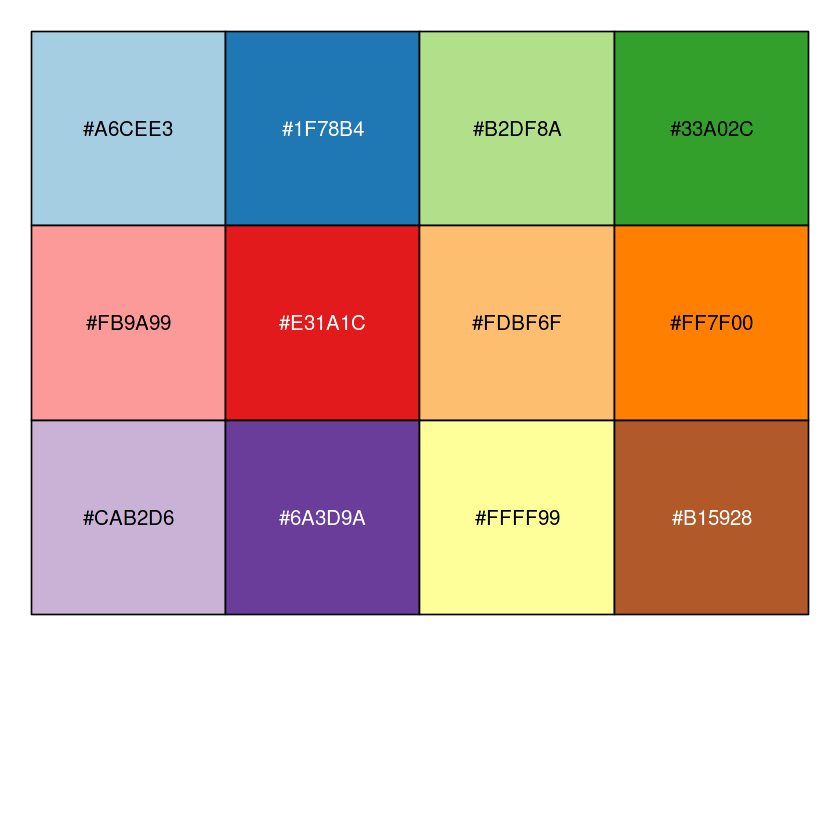

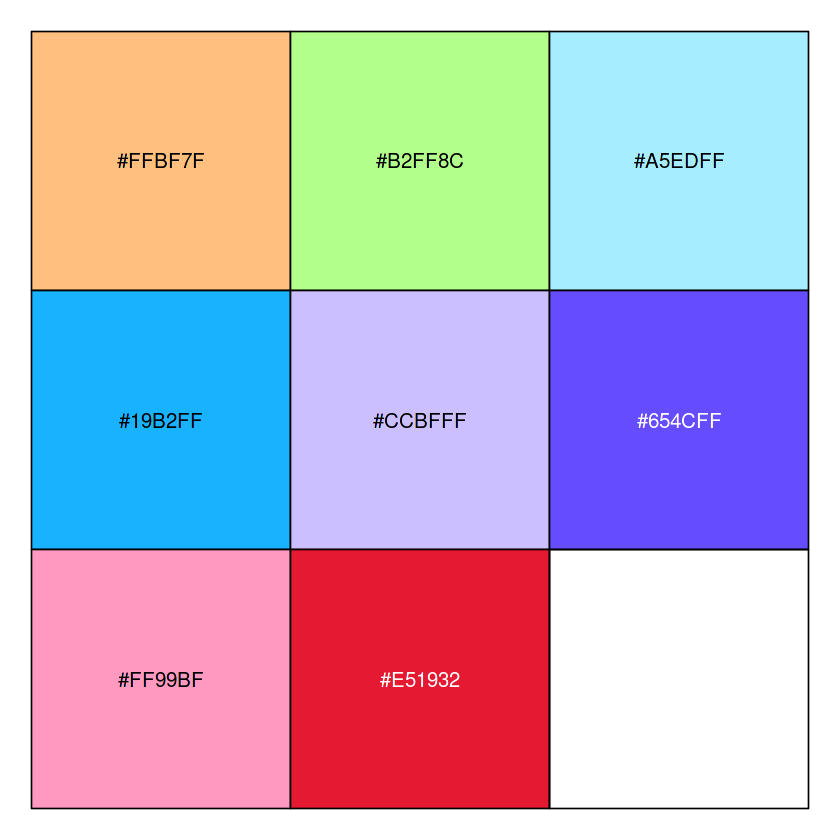

In [2]:
source("utils.R")
library(colorBlindness)
names(PairedColor12Steps) <- NULL
my_col_method <- PairedColor12Steps[c(1,5,7,8,9,10,11,12)]
show_col(my_col_m)
show_col(my_col_method)

# Scalability

In [3]:
# dirs <- c("/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures25k/",
#           "/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures100k/",
#           "/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures200k/",
#         #   "/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures300k/",
#           "/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures500k/")

# nfeatures <- c(25000, 100000, 200000, 500000)

# dls <- c("Cell_line_mixing", "candidate1", "candidate2", "Buenrostro_2018", "Chen_2019", "PBMC_multiomics")
# mds <- c("/feature_engineering/R/aggregation/default/500/default/15.RDS.benchmark",
#          "/feature_engineering/R/ArchR/tiles/500/default/15.RDS.benchmark",
#          "/feature_engineering/R/Signac/all_cell_peaks/0/default/15.RDS.benchmark",
#          "/feature_engineering/R/SnapATAC1/default/5000/default/15.RDS.benchmark",
#          "/feature_engineering/python/SnapATAC2/default/500/cosine/15.h5ad.benchmark"
#         )
# mdn <- c("aggregation", "ArchR", "Signac", "SnapATAC1", "SnapATAC2")
# bFiles <- c()
# for (i in 1:length(dirs)) {
#     dir <- dirs[i]
#     nf <- nfeatures[i]
#     for (dataset in dls) {
#         for(j in 1:length(mds)){
#             md <- mds[j]
#             bFile <- paste0(dir, dataset, md)
#             df <- read.table(bFile, sep="\t", header=TRUE, row.names = 1)
#             df$dataset <- dataset
#             df$dir <- dir
#             df$nfeatures <- nf
#             df$method <- mdn[j]
#             write.table(df, file=paste0(bFile, ".0.tsv"), sep="\t", col.names =TRUE, quote = FALSE)
#             bFiles <- c(bFiles, bFile)
#         }
#     }
# }

# combined_df <- paste0(bFiles, ".0.tsv") %>%
#   lapply(read.table, sep="\t", row.names=1, header=TRUE) %>%
#   bind_rows()

In [4]:
# combined_df$s <- rownames(combined_df)
# rownames(combined_df) <- NULL
# combined_df$s <- as.numeric(combined_df$s)
# # combined_df$n_cells <- sapply(combined_df$dataset, function(x){return(size[which(x==dls)])})
# head(combined_df)

,h.m.s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,dataset,dir,nfeatures,method,s
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,0:19:22,11368.68,11650.84,11321.61,11331.77,12.60,4848.84,95.22,778.76,Cell_line_mixing,/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures25k/,25000,aggregation,1162.0145
2,0:27:20,3159.04,3410.32,3107.78,3119.38,13.41,3794.16,83.30,1367.28,Cell_line_mixing,/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures25k/,25000,ArchR,1640.8688
3,0:16:27,5072.27,5575.57,5037.38,5042.84,158.92,4732.23,92.01,640.03,Cell_line_mixing,/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures25k/,25000,Signac,987.2067
4,1:01:47,27477.42,49541.87,27433.41,27442.57,29.25,19654.00,73.88,431.46,Cell_line_mixing,/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures25k/,25000,SnapATAC1,3707.7185
5,0:06:04,8333.36,22254.98,8310.22,8318.38,78.52,12196.75,251.95,919.78,Cell_line_mixing,/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures25k/,25000,SnapATAC2,364.8152
6,0:16:34,9047.98,9329.88,9012.63,9018.20,154.60,4014.92,91.98,676.15,candidate1,/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures25k/,25000,aggregation,994.3044


In [3]:
log10_minor_break = function (...){
  function(x) {
    minx         = floor(min(log10(x), na.rm=T))-1;
    maxx         = ceiling(max(log10(x), na.rm=T))+1;
    n_major      = maxx-minx+1;
    major_breaks = seq(minx, maxx, by=1)
    minor_breaks = 
      rep(log10(seq(1, 9, by=1)), times = n_major)+
      rep(major_breaks, each = 9)
    return(10^(minor_breaks))
  }
}
# mapping <- list("Cell_line_mixing" = "Cell line", 
#                 "candidate1" = "Atlas1", 
#                 "candidate2" = "Atlas2",
#                      "Buenrostro_2018" = "Buenrostro2018",
#                      "Chen_2019" = "Chen2019",
#                      "PBMC_multiomics" = "10XPBMC")
# combined_df <- combined_df %>% 
#   mutate(dataset_short = case_when(as.character(dataset) %in% names(mapping) ~ mapping[as.character(dataset)]))
# combined_df$dataset_short <- unlist(combined_df$dataset_short)

# head(combined_df)


In [8]:
# combined_df[combined_df$method=="SnapATAC1", "method"] <- "SnapATAC"

In [9]:
# head(combined_df)

,h.m.s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,dataset,dir,nfeatures,method,s,dataset_short
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
1,0:19:22,11368.68,11650.84,11321.61,11331.77,12.60,4848.84,95.22,778.76,Cell_line_mixing,/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures25k/,25000,aggregation,1162.0145,Cell line
2,0:27:20,3159.04,3410.32,3107.78,3119.38,13.41,3794.16,83.30,1367.28,Cell_line_mixing,/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures25k/,25000,ArchR,1640.8688,Cell line
3,0:16:27,5072.27,5575.57,5037.38,5042.84,158.92,4732.23,92.01,640.03,Cell_line_mixing,/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures25k/,25000,Signac,987.2067,Cell line
4,1:01:47,27477.42,49541.87,27433.41,27442.57,29.25,19654.00,73.88,431.46,Cell_line_mixing,/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures25k/,25000,SnapATAC,3707.7185,Cell line
5,0:06:04,8333.36,22254.98,8310.22,8318.38,78.52,12196.75,251.95,919.78,Cell_line_mixing,/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures25k/,25000,SnapATAC2,364.8152,Cell line
6,0:16:34,9047.98,9329.88,9012.63,9018.20,154.60,4014.92,91.98,676.15,candidate1,/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures25k/,25000,aggregation,994.3044,Atlas1


In [10]:
# combined_df$dataset_short <- factor(combined_df$dataset_short, levels=c("Buenrostro2018", "Chen2019", "10XPBMC", "Atlas2", "Cell line", "Atlas1"))

In [11]:
# write.table(combined_df, file="../result_files/n_feature_analysis.tsv", sep="\t", quote = FALSE)

In [4]:
combined_df <- read.table(file="../result_files/n_feature_analysis.tsv", sep="\t")

`geom_smooth()` using formula = 'y ~ x'


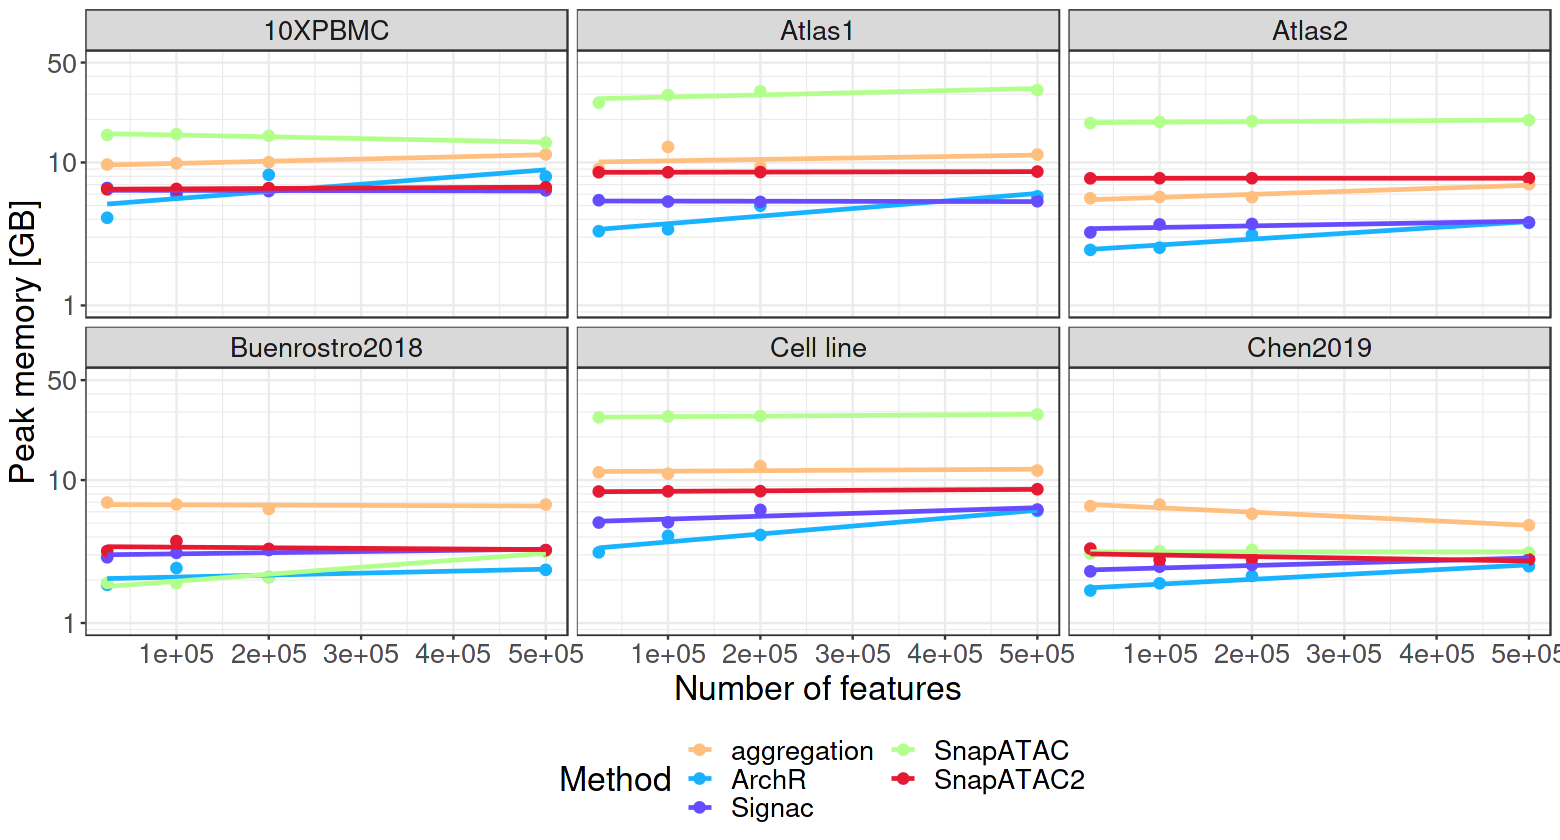

In [11]:
options(repr.plot.width=13, repr.plot.height=7)

p2s <- combined_df %>% ggplot(aes(x=nfeatures, y=max_pss, color=method)) +
geom_point(size=2.5) + 
facet_wrap(~dataset_short) +
geom_smooth(method = "lm", se = FALSE) +
scale_colour_manual(values = my_col_method[c(1, 4, 6, 2, 8)]) +
scale_y_continuous(trans = 'log10',
                   breaks = c(1000, 10000, 50000),
                   labels = c("1", "10", "50"), 
                   limits=c(1000, 50000),
                   minor_breaks=log10_minor_break()) +
theme_bw() +
theme(text = element_text(size = 20), legend.position = "bottom", legend.box="vertical") + 
labs(x="Number of features", y="Peak memory [GB]", color='Method') +
# annotation_logticks(base = 10) #+
  guides(color=guide_legend(nrow=3, byrow=FALSE))  
p2s

In [7]:
range(combined_df$s)

[1]   71.825 3899.140

`geom_smooth()` using formula = 'y ~ x'


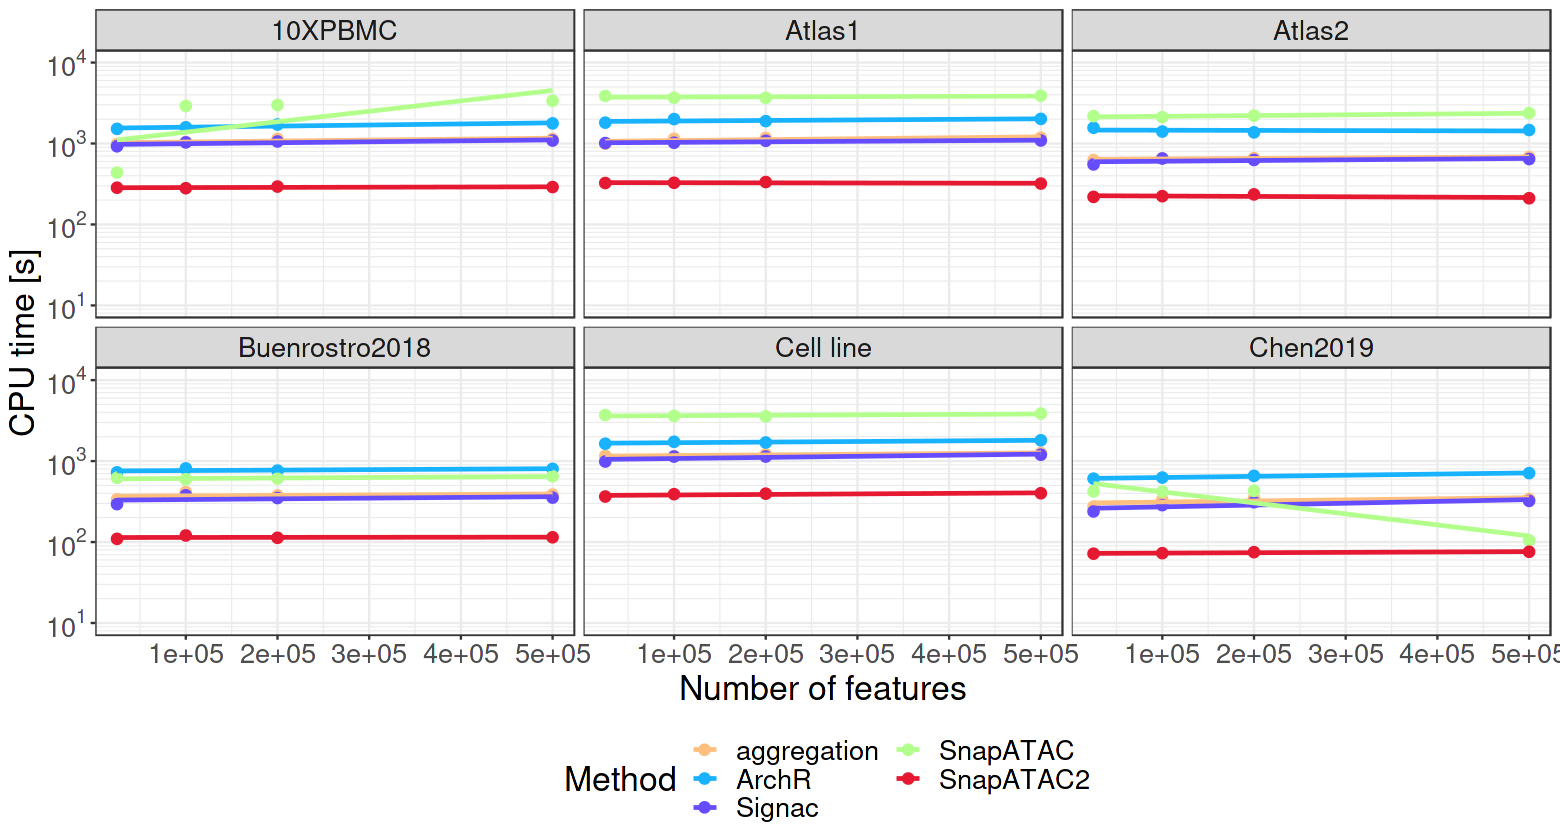

In [12]:
options(repr.plot.width=13, repr.plot.height=7)

ps <- combined_df %>% ggplot(aes(x=nfeatures, y=s, color=method)) +
geom_point(size=2.5) + 
geom_smooth(method = "lm", se = FALSE) +
scale_colour_manual(values = my_col_method[c(1, 4, 6, 2, 8)]) +
scale_y_continuous(trans = 'log10',
                   breaks = trans_breaks('log10', function(x) 10^x, n=3),
                   labels = trans_format('log10', math_format(10^.x)), 
                   limits=c(10, 10000),
                   minor_breaks=log10_minor_break()) +
theme_bw() +
facet_wrap(~dataset_short) +
theme(text = element_text(size = 20), legend.position = "bottom", legend.box="vertical") + 
labs(x="Number of features", y="CPU time [s]", color='Method') +
# annotation_logticks(base = 10) +
  guides(color=guide_legend(nrow=3, byrow=FALSE))  

ps

In [13]:
pdf("../figures/nfeatures_scalability1.pdf", width=13, height=7)
plot(ps)
dev.off() 

`geom_smooth()` using formula = 'y ~ x'


png 
  2

In [14]:
pdf("../figures/nfeatures_scalability2.pdf", width=13, height=7)
plot(p2s)
dev.off() 

`geom_smooth()` using formula = 'y ~ x'


png 
  2

# Collect results

In [15]:
# dirs <- c("/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures25k/",
#           "/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures100k/",
#           "/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures200k/",
#           "/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures300k/",
#           "/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures500k/",
#           "/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/outputs/nfeatures_false/")

# nfeatures <- c(25000, 100000, 200000, 300000, 500000, Inf)

In [ ]:
# j <- 6
# df <- read.table(paste0(dirs[j], "metric_file_seed.tsv"), sep="\t", header=TRUE)
# file_names <- paste0(dirs[j], df$file)
# nf <- nfeatures[j]

In [ ]:
# for(i in 1:length(file_names)){
#     file <- file_names[i]
#     tmp <- read.table(file, sep="\t", row.names=1, header=TRUE)
#     tmp$dataset <- df[i, "scenario"]
#     tmp$method <- df[i, "method"]
#     write.table(tmp, file=paste0(file, ".0.tsv"), sep="\t", col.names =TRUE, quote = FALSE)
# }

In [ ]:
# combined_df <- paste0(file_names, ".0.tsv") %>%
#   lapply(read.table, sep="\t", row.names=1, header=TRUE) %>%
#   bind_rows()

# rownames(combined_df) <- NULL
# combined_df$nfeatures <- nf

In [ ]:
# dim(combined_df)
# combined_df

[1] 84  5

metric,value,dataset,method,nfeatures
<chr>,<dbl>,<chr>,<chr>,<dbl>
ARI,0.95614280,Cell_line_mixing,SnapATAC1,Inf
AMI,0.93260002,Cell_line_mixing,SnapATAC1,Inf
MI,2.08946282,Cell_line_mixing,SnapATAC1,Inf
VI,0.21302079,Cell_line_mixing,SnapATAC1,Inf
AW,0.92358310,Cell_line_mixing,SnapATAC1,Inf
AV,0.99108209,Cell_line_mixing,SnapATAC1,Inf
AW2,0.93262518,Cell_line_mixing,SnapATAC1,Inf
AV2,0.91979517,Cell_line_mixing,SnapATAC1,Inf
ARI2,0.92616574,Cell_line_mixing,SnapATAC1,Inf


In [ ]:
# # write.table(combined_df, file=paste0("metrics_value_", sprintf("%.0f", nf), ".tsv"), sep="\t", quote=FALSE)
# write.table(combined_df, file=paste0("metrics_value_", nf, ".tsv"), sep="\t", quote=FALSE)

# Combine

In [17]:
# file_names <- c("/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/metrics_value_25000.tsv",
#                 "/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/metrics_value_100000.tsv",
#                 "/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/metrics_value_200000.tsv",
#                 "/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/metrics_value_300000.tsv",
#                 "/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/metrics_value_500000.tsv")

# combined_df <- file_names %>%
#   lapply(read.table, sep="\t", row.names=1, header=TRUE) %>%
#   bind_rows()

# rownames(combined_df) <- NULL


In [18]:
# dim(combined_df)

[1] 1764    5

In [19]:
# tmp <- read.table("/home/siluo/public/SiyuanLuo/projects/rebuttal/number_of_features/metrics_value_all.tsv", sep="\t", row.names=1, header=TRUE)
# tmp$nfeatures <- Inf
# combined_df <- rbind(combined_df, tmp)

In [20]:
# combined_df <- combined_df %>% filter(nfeatures %in% c(25000, 100000, 200000, 500000))

In [22]:
# write.table(combined_df, file=paste0("../result_files/metrics_values_nfeatures.tsv"), sep="\t", quote=FALSE)

In [ ]:
combined_df <- read.table(file="../result_files/metrics_values_nfeatures.tsv", sep="\t")

In [21]:
head(combined_df)

,metric,value,dataset,method,nfeatures
,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,ARI,0.9625765,Cell_line_mixing,Signac,25000
2,AMI,0.9422117,Cell_line_mixing,Signac,25000
3,MI,2.0888293,Cell_line_mixing,Signac,25000
4,VI,0.1908050,Cell_line_mixing,Signac,25000
5,AW,0.9362937,Cell_line_mixing,Signac,25000
6,AV,0.9903776,Cell_line_mixing,Signac,25000


# Visualization

In [23]:
unique(combined_df$metric)

[1] "ARI"              "AMI"              "MI"               "VI"              
 [5] "AW"               "AV"               "AW2"              "AV2"             
 [9] "ARI2"             "Silhouette_label" "FNS"              "cLISI_label"     
[13] "log_geary_c_knn"  "avg_pwc_snn"

In [24]:
metric_name <- "ARI"

df_m <- combined_df %>% filter(metric==metric_name)
dataset_name <- c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC")
mapping <- list("Cell_line_mixing" = "Cell line", 
                     "candidate1" = "Atlas1", 
                     "candidate2" = "Atlas2",
                     "Buenrostro_2018" = "Buenrostro2018",
                     "Chen_2019" = "Chen2019",
                     "PBMC_multiomics" = "10XPBMC")
df_m <- df_m %>% 
  mutate(dataset_short = case_when(as.character(dataset) %in% names(mapping) ~ mapping[as.character(dataset)]))
df_m$dataset_short <- factor(df_m$dataset_short, levels = dataset_name)

df_m$method[df_m$method=="SnapATAC1"] <- "SnapATAC"
df_m$method <- factor(df_m$method, levels=c("aggregation", "ArchR", "Signac","SnapATAC", "SnapATAC2"))


In [25]:
df_m$dataset <- NULL
names(df_m)[names(df_m) == "dataset_short"] <- "dataset"
df_m$long_method <- as.character(df_m$method)
df_m[df_m$method=="Signac", "long_method"] <- "Signac_all_cell_peaks"
df_m[df_m$method=="ArchR", "long_method"] <- "ArchR_tiles"
df_m[df_m$method=="SnapATAC2", "long_method"] <- "SnapATAC2_cosine"

In [26]:
head(df_m)

,metric,value,method,nfeatures,dataset,long_method
,<chr>,<dbl>,<fct>,<dbl>,<fct>,<chr>
1,ARI,0.9625765,Signac,25000,Cell line,Signac_all_cell_peaks
10,ARI,0.9669333,ArchR,25000,Cell line,ArchR_tiles
19,ARI,0.5642002,SnapATAC,25000,Cell line,SnapATAC
28,ARI,0.9670935,aggregation,25000,Cell line,aggregation
37,ARI,0.5499558,SnapATAC2,25000,Cell line,SnapATAC2_cosine
46,ARI,0.9731554,Signac,25000,Atlas1,Signac_all_cell_peaks


In [28]:
old <- read.table(file="../result_files/results_best_ARI.tsv", sep="\t", header=TRUE)
old <- old[, c("metric", "value", "long_method", "method", "dataset")]

In [29]:
old <- old[old$long_method %in% unique(df_m$long_method),] 
head(old)

,metric,value,long_method,method,dataset
,<chr>,<dbl>,<chr>,<chr>,<chr>
2,ARI,0.7131746,ArchR_tiles,ArchR,10XPBMC
3,ARI,0.8529857,Signac_all_cell_peaks,Signac,10XPBMC
5,ARI,0.8616226,SnapATAC,SnapATAC,10XPBMC
6,ARI,0.8514935,SnapATAC2_cosine,SnapATAC2,10XPBMC
8,ARI,0.7801863,aggregation,aggregation,10XPBMC
10,ARI,0.9518434,ArchR_tiles,ArchR,Atlas1


In [30]:
old$result <- "old"
df_m$result <- "new"
old$nfeatures <- NA
old[old$method=="ArchR", "nfeatures"] <- 25000
old[old$method=="Signac", "nfeatures"] <- 200000
old[old$method=="aggregation", "nfeatures"] <- 200000
old[old$method=="SnapATAC", "nfeatures"] <- 500000
old[old$method=="SnapATAC2", "nfeatures"] <- 500000

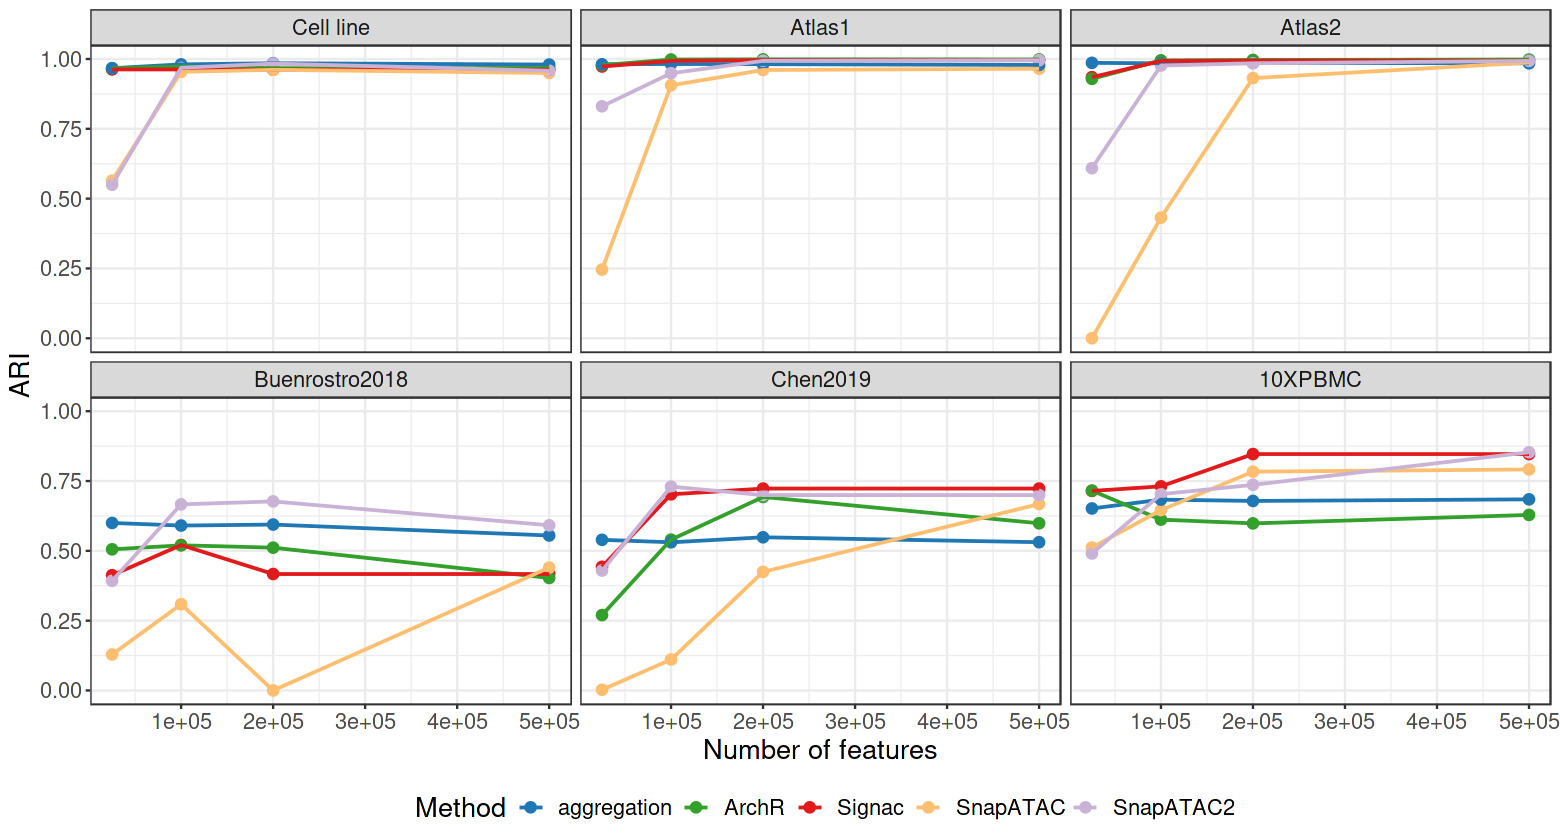

In [31]:
options(repr.plot.width=13, repr.plot.height=7)
p1 <- df_m  %>% ggplot(aes(x=nfeatures, y=value, color=method)) + 
facet_wrap(~dataset) +
geom_point(size=2.5) + geom_line(linewidth=0.8) + 
scale_color_manual(values = my_col_m[c(2, 4, 6, 7, 9)]) +
theme_bw() +
theme(text = element_text(size = 16),legend.position = "bottom") + 
labs(x="Number of features", y="ARI", color="Method")

p1

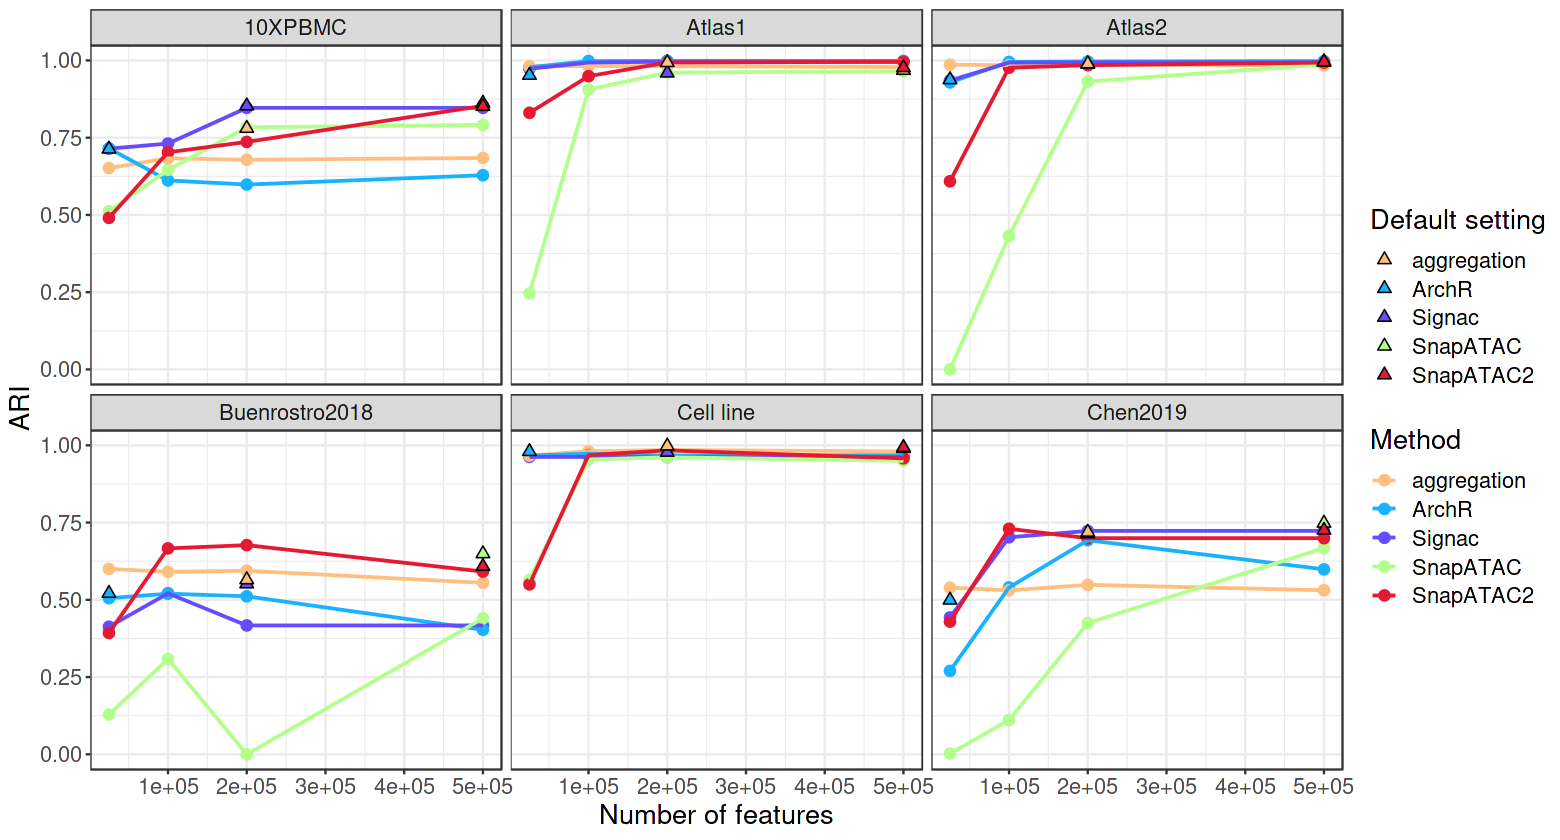

In [33]:
options(repr.plot.width=13, repr.plot.height=7)
p2 <- ggplot() + 
geom_point(data=df_m, aes(x=nfeatures, y=value, color=method), size=2.5) + 
geom_line(data=df_m, aes(x=nfeatures, y=value, color=method), linewidth=0.8) + 
facet_wrap(~dataset) +
geom_point(data=old, aes(x=nfeatures, y=value, fill=method), size=2.5, colour="black",pch=24) + 
scale_color_manual(values = my_col_method[c(1, 4, 6, 2, 8)], name = "Method") +
scale_fill_manual(values = my_col_method[c(1, 4, 6, 2, 8)], name = "Default setting") +
theme_bw() +
theme(text = element_text(size = 16)) + 
labs(x="Number of features", y="ARI", color="Method")

p2

In [34]:
pdf(file="../figures/nfeatures_analysis.pdf", width=13, height=6)
print(p2)
dev.off()

png 
  2

In [ ]:
df_m %>% filter(method=="SnapATAC" & nfeatures==Inf)

,metric,value,dataset,method,nfeatures,dataset_short
,<chr>,<dbl>,<chr>,<fct>,<dbl>,<fct>
1765,ARI,0.9561428,Cell_line_mixing,SnapATAC,Inf,Cell line
10100,ARI,0.9952023,candidate1,SnapATAC,Inf,Atlas1
1910,ARI,0.9918441,candidate2,SnapATAC,Inf,Atlas2
2810,ARI,0.3706960,Buenrostro_2018,SnapATAC,Inf,Buenrostro2018
3710,ARI,0.6701050,Chen_2019,SnapATAC,Inf,Chen2019
4610,ARI,0.8605295,PBMC_multiomics,SnapATAC,Inf,10XPBMC


In [ ]:
df_m %>% filter(method=="ArchR" & nfeatures==25000)

metric,value,method,nfeatures,dataset,long_method,result
<chr>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<chr>
ARI,0.9669333,ArchR,25000,Cell line,ArchR_tiles,new
ARI,0.9781158,ArchR,25000,Atlas1,ArchR_tiles,new
ARI,0.9289780,ArchR,25000,Atlas2,ArchR_tiles,new
ARI,0.5054166,ArchR,25000,Buenrostro2018,ArchR_tiles,new
ARI,0.2698771,ArchR,25000,Chen2019,ArchR_tiles,new
ARI,0.7154768,ArchR,25000,10XPBMC,ArchR_tiles,new


In [ ]:
old %>% filter(dataset == "Buenrostro2018")

metric,value,long_method,method,dataset,result,nfeatures
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
ARI,0.5210552,ArchR_tiles,ArchR,Buenrostro2018,old,25000
ARI,0.5515733,Signac_all_cell_peaks,Signac,Buenrostro2018,old,200000
ARI,0.6490968,SnapATAC,SnapATAC,Buenrostro2018,old,500000
ARI,0.6080315,SnapATAC2_cosine,SnapATAC2,Buenrostro2018,old,500000
ARI,0.5650096,aggregation,aggregation,Buenrostro2018,old,200000


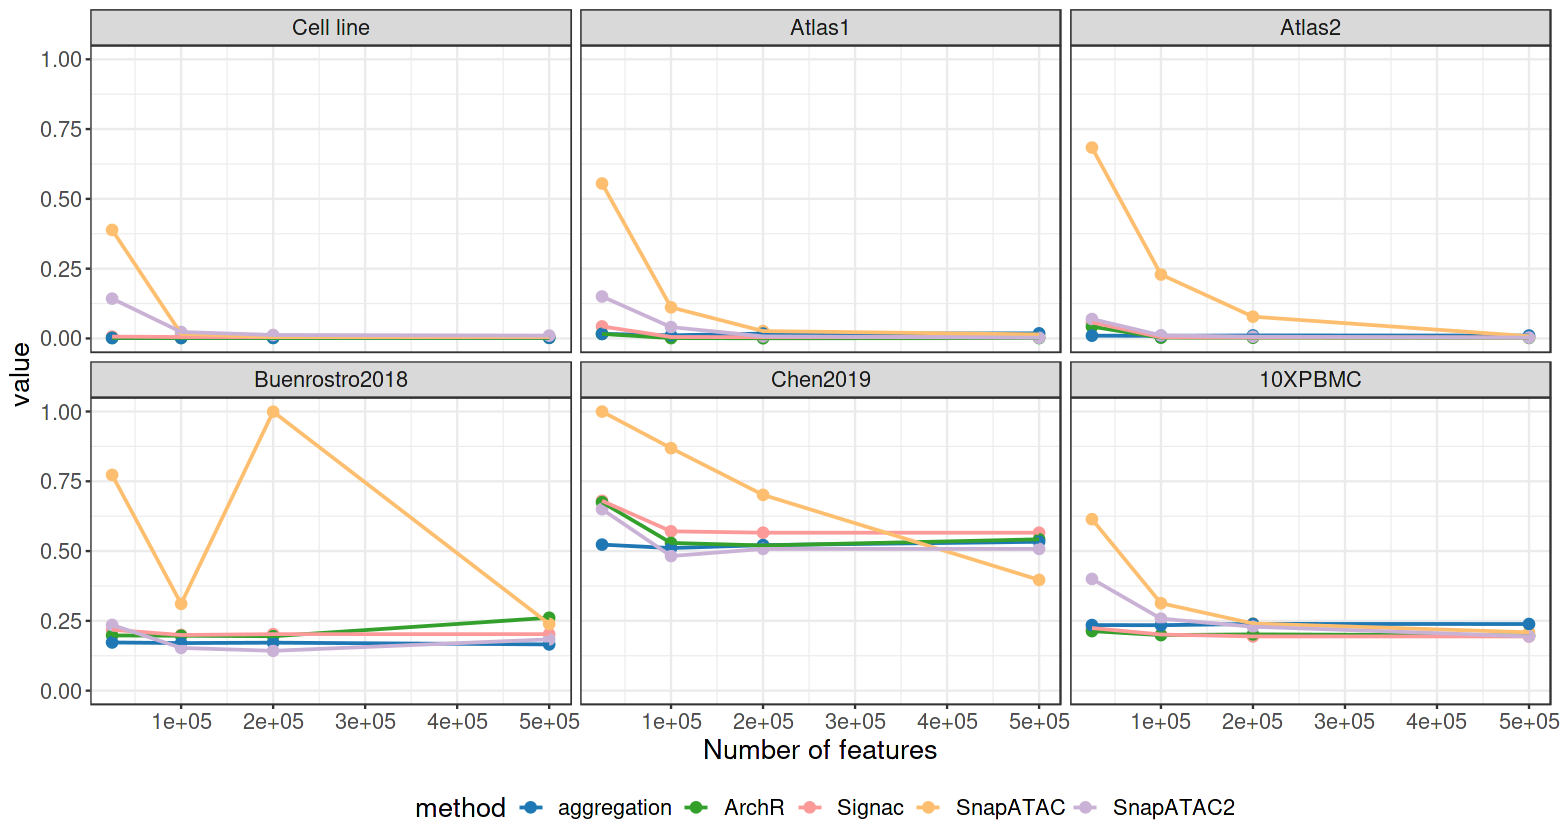

In [ ]:
options(repr.plot.width=13, repr.plot.height=7)
p2 <- df_m %>% ggplot(aes(x=nfeatures, y=value, color=method)) + 
facet_wrap(~dataset_short) +
geom_point(size=2.5) + geom_line(linewidth=0.8) + 
scale_color_manual(values = my_col_m[c(2, 4, 5, 7, 9)]) +
theme_bw() +
theme(text = element_text(size = 16),legend.position = "bottom") + 
labs(x="Number of features")

p2